In [1]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.legend_handler import HandlerLine2D
from sklearn.preprocessing import MinMaxScaler

import re
import nltk
from nltk.corpus import stopwords
import unicodedata
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
import datasets 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn import svm
from time import time
from pandas import DataFrame
from pathlib import Path

from sklearn.model_selection import GridSearchCV

from nltk.sentiment import SentimentIntensityAnalyzer




In [ ]:
# This is a dataset for classification that has been generated by some experts as part of the dynabench project: https://dynabench.org/tasks/hs and https://arxiv.org/abs/2012.15761
data_gen=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/prepared_hate_data_train.csv",index_col=0)
data_gen.head()




In [ ]:
data_gen.iloc[:,13]

In [ ]:
data_gen

In [ ]:
train=data_gen.loc[data_gen['split']=="train"]
test=data_gen.loc[data_gen['split']=="test"]
train=train.reset_index()
train=train.drop(['index'],axis=1)
test=test.reset_index()
test=test.drop(['index'],axis=1)
X_hate_train = train.text_nostop
y_hate_train = train['Hate speech']

X_hate_test = test.text_nostop
y_hate_test = test['Hate speech']

outcome_variables= ['Hate speech','Religion','Ethnicity/Race','Gender','Sexuality and Sexual preference','Ableness / disability','Immigration status']


In [ ]:
# setting up training data sets for target specific hate speech
train_type_only=train.loc[train['target']!="notgiven"]
test_type_only=test.loc[test['target']!="notgiven"]
train_type_only=train_type_only.loc[train_type_only['target']!="notargetrecorded"]
test_type_only=test_type_only.loc[test_type_only['target']!="notargetrecorded"]
train_type_only=train_type_only.dropna(subset=['target'])
test_type_only=test_type_only.dropna(subset=['target'])

train_type_only=train_type_only.reset_index()
train_type_only=train_type_only.drop(['index'],axis=1)
test_type_only=test_type_only.reset_index()
test_type_only=test_type_only.drop(['index'],axis=1)


In [ ]:
test_type_only

In [ ]:


# train datasets for specific type of hate
X_type_train = train_type_only.text_nostop
y_religion_train = train_type_only.Religion

y_ethnicity_train = train_type_only['Ethnicity/Race'] # 2307

y_gender_train = train_type_only['Gender'] # 3312

y_sexuality_train = train_type_only['Sexuality and Sexual preference'] # 1245 pos

y_disability_train = train_type_only['Ableness / disability'] # 438 pos results

#y_support_train = train_type_only['Support'] # only 88 so will not include

y_immigration_train = train_type_only['Immigration status'] # 1254 pos results

#y_ageism_train = train_type_only['Oldist'] # only 18 positive likely too few

#y_class_train = train_type_only['Class'] # no data, not to be used

# test data
X_type_test = test_type_only.text_nostop
y_religion_test = test_type_only.Religion # 244 positive results

y_ethnicity_test = test_type_only['Ethnicity/Race'] # 333 positive results

y_gender_test = test_type_only['Gender'] # 373 positive results

y_sexuality_test = test_type_only['Sexuality and Sexual preference'] # 147 positive results

y_disability_test = test_type_only['Ableness / disability'] # 79 positive results

#y_support_test = test_type_only['Support'] # only 15 may be removable

y_immigration_test = test_type_only['Immigration status'] #165 positive reulsts

#y_ageism_test = test_type_only['Oldist'] # very little data here (5 pos results) - may be too few

#y_class_test = test_type_only['Class'] # no positive results so will not use

In [ ]:
# importing the prepared twitter and reddit data
twitter=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/twitter_prepared.csv")
twitter=twitter.dropna(subset=['text_nostop'])
twitter=twitter.reset_index()
twitter=twitter.drop(['index'],axis=1)
twitter_text=twitter.text_nostop
reddit=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/reddit_prepared.csv")
reddit=reddit.dropna(subset=['text_nostop'])
reddit=reddit.reset_index()
reddit=reddit.drop(['index'],axis=1)
reddit_text=reddit.text_nostop





In [ ]:
twitter

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='char_wb', ngram_range=(1,4))
# run term frequence inverse document frequency
# first on the overall hate dataset
tfidf_train = tfidf_vect.fit_transform(X_hate_train)
tfidf_test = tfidf_vect.transform(X_hate_test)
twitter_test = tfidf_vect.transform(twitter_text)
reddit_test = tfidf_vect.transform(reddit_text)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())
tfidf_df_test = pd.DataFrame(tfidf_test.A, columns=tfidf_vect.get_feature_names())
tfidf_df_twitter = pd.DataFrame(twitter_test.A, columns=tfidf_vect.get_feature_names())
tfidf_df_reddit = pd.DataFrame(reddit_test.A, columns=tfidf_vect.get_feature_names())


# then just on the type dataset
tfidf_vect_type = TfidfVectorizer(analyzer='char_wb', ngram_range=(1,4))
tfidf_type_train = tfidf_vect_type.fit_transform(X_type_train)
tfidf_type_test = tfidf_vect_type.transform(X_type_test)
tfidf_type_df = pd.DataFrame(tfidf_type_train.A, columns=tfidf_vect_type.get_feature_names())




twitter_test 

In [ ]:
twitter_type_test = tfidf_vect_type.transform(twitter_text)
reddit_type_test = tfidf_vect_type.transform(reddit_text)

In [ ]:
search_words = pd.read_csv('/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/Dynamically-Generated-Hate-Speech-Dataset-main/hurtlex-master/lexica/EN/1.2/hurtlex_EN.tsv', sep='\t')
search_words = search_words.drop_duplicates(subset=["lemma"], keep="first")
tfidf_vect_hurtlex = TfidfVectorizer(vocabulary=search_words['lemma'])
tfidf_train_hurtlex = tfidf_vect_hurtlex.fit_transform(X_hate_train)
tfidf_test_hurtlex = tfidf_vect_hurtlex.transform(X_hate_test)
twitter_test_hurtlex = tfidf_vect_hurtlex.transform(twitter_text)
reddit_test_hurtlex = tfidf_vect_hurtlex.transform(reddit_text)
tfidf_df_hurtlex = pd.DataFrame(tfidf_train_hurtlex.A, columns=tfidf_vect_hurtlex.get_feature_names())
tfidf_df_test_hurtlex = pd.DataFrame(tfidf_test_hurtlex.A, columns=tfidf_vect_hurtlex.get_feature_names())
tfidf_df_twitter_hurtlex = pd.DataFrame(twitter_test_hurtlex.A, columns=tfidf_vect_hurtlex.get_feature_names())
tfidf_df_reddit_hurtlex = pd.DataFrame(reddit_test_hurtlex.A, columns=tfidf_vect_hurtlex.get_feature_names())

In [ ]:
tfidf_df

In [ ]:
extra_train=train[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']]

extra_test=test[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']]

extra_type_test=test_type_only[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']]

extra_type_train=train_type_only[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']]


extra_reddit=reddit[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']]

extra_twitter=twitter[['qas', 'cds', 'is', 're', 'om',
       'an', 'or', 'svp', 'asm', 'pr', 'dmc', 'asf', 'ddp', 'ps', 'pa', 'rci',
       'ddf', 'hurtlex', 'capital_letters', 'neg', 'neu', 'pos', 'compound']]



In [ ]:
X_type_train

In [ ]:
extra_type_train

In [16]:
extra_train_df=pd.concat([tfidf_df,extra_train],axis=1)
extra_test_df=pd.concat([tfidf_df_test,extra_test],axis=1)

scaler_X = MinMaxScaler()
extra_train_np = scaler_X.fit_transform(extra_train_df) # Scaling  training set
extra_test_np = scaler_X.transform(extra_test_df) # Scaling test set

: 

: 

In [16]:
extra_reddit_df=pd.concat([tfidf_df_reddit,extra_reddit],axis=1)

,,,,a,an,and,b,bl,bla,t,...,🥵😂😂😍,🥵😳,🥵😳,🥶,🥶😂,🥶😂😂,🥶😂😂🤣,🥶🥶,🥶🥶😂,🥶🥶😂😂
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
extra_reddit_np = scaler_X.transform(extra_reddit_df) # Scaling reddit set

,qas,cds,is,re,om,an,or,svp,asm,pr,...,ps,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21,0.000,0.549,0.451,0.7125
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,2,2,0.000,1.000,0.000,0.0000
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,5,0.000,1.000,0.000,0.0000
3,0,3,0,0,0,1,0,0,0,1,...,0,0,0,0,3,9,0.268,0.336,0.396,0.4033
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,2,2,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175442,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0.467,0.533,0.000,-0.5423
175443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0.000,1.000,0.000,0.0000
175444,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0.000,1.000,0.000,0.0000
175445,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,0.000,0.674,0.326,0.4404


In [43]:
extra_twitter1=pd.concat([tfidf_df_twitter.iloc[0:50000,:],extra_twitter.iloc[0:50000,:]],axis=1)



: 

: 

In [ ]:
extra_twitter2=pd.concat([tfidf_df_twitter.iloc[50001:100000,:],extra_twitter.iloc[50001:100000,:]],axis=1)

In [ ]:
extra_twitter3=pd.concat([tfidf_df_twitter.iloc[100001:175446,:],extra_twitter.iloc[100001:175446,:]],axis=1)

In [ ]:

extra_twitter = scaler_X.transform(extra_twitter1) # Scaling  twitter set
extra_twitter = scaler_X.transform(extra_twitter2) # Scaling  twitter set
extra_twitter = scaler_X.transform(extra_twitter3) # Scaling  twitter set


In [15]:
# on logistic regression on hate speech with extra data
print("Results for logistic regression on all hate speech")
logregression_extra = LogisticRegression(random_state=0,solver='liblinear')
logregression_extra.fit(tfidf_train_hurtlex,y_hate_train)
y_pred_test1 = logregression_extra.predict(tfidf_test_hurtlex)
y_pred_train1 = logregression_extra.predict(tfidf_train_hurtlex)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))


Results for logistic regression on all hate speech
Accuracy on training data:
[[ 6694  8490]
 [ 3985 13755]]
              precision    recall  f1-score   support

           0       0.63      0.44      0.52     15184
           1       0.62      0.78      0.69     17740

    accuracy                           0.62     32924
   macro avg       0.62      0.61      0.60     32924
weighted avg       0.62      0.62      0.61     32924

Accuracy on test data:
[[ 734 1118]
 [ 596 1672]]
              precision    recall  f1-score   support

           0       0.55      0.40      0.46      1852
           1       0.60      0.74      0.66      2268

    accuracy                           0.58      4120
   macro avg       0.58      0.57      0.56      4120
weighted avg       0.58      0.58      0.57      4120



In [ ]:
# Predicting hate speech with logistic regression
y_pred_twitter_logreg_extra = logregression_extra.predict(extra_twitter)
y_pred_reddit_logreg_extra = logregression_extra.predict(extra_reddit)

# concatenating the results
y_pred_twitter_logreg_df_extra=pd.DataFrame(y_pred_twitter_logreg_extra)
y_pred_twitter_logreg_df_extra.columns=['log_regression_extra']
y_pred_reddit_logreg_df_extra=pd.DataFrame(y_pred_reddit_logreg_extra)
y_pred_reddit_logreg_df_extra.columns=['log_regression_extra']
twitter=pd.concat([twitter,y_pred_twitter_logreg_df_extra],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_logreg_df_extra],axis=1)

ValueError: X has 68854 features per sample; expecting 68877

In [12]:
# on logistic regression on hate speech
print("Results for logistic regression on all hate speech")
logregression = LogisticRegression(random_state=0,solver='liblinear')
logregression.fit(tfidf_train,y_hate_train)
y_pred_test2 = logregression.predict(tfidf_test)
y_pred_train2 = logregression.predict(tfidf_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train2))
print(classification_report(y_hate_train,y_pred_train2))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test2))
print(classification_report(y_hate_test,y_pred_test2))


Results for logistic regression on all hate speech
Accuracy on training data:
[[10871  4313]
 [ 3455 14285]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     15184
           1       0.77      0.81      0.79     17740

    accuracy                           0.76     32924
   macro avg       0.76      0.76      0.76     32924
weighted avg       0.76      0.76      0.76     32924

Accuracy on test data:
[[1078  774]
 [ 705 1563]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1852
           1       0.67      0.69      0.68      2268

    accuracy                           0.64      4120
   macro avg       0.64      0.64      0.64      4120
weighted avg       0.64      0.64      0.64      4120



In [13]:
# Predicting hate speech with logistic regression
y_pred_twitter_logreg = logregression.predict(twitter_test)
y_pred_reddit_logreg = logregression.predict(reddit_test)

# concatenating the results
y_pred_twitter_logreg_df=pd.DataFrame(y_pred_twitter_logreg)
y_pred_twitter_logreg_df.columns=['log_regression']
y_pred_reddit_logreg_df=pd.DataFrame(y_pred_reddit_logreg)
y_pred_reddit_logreg_df.columns=['log_regression']
twitter=pd.concat([twitter,y_pred_twitter_logreg_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_logreg_df],axis=1)

In [ ]:
twitter

,Unnamed: 0,id,created,text,possibly_sensitive,user,verified,rule,language,text_nostop,...,pa,rci,ddf,hurtlex,capital_letters,neg,neu,pos,compound,log_regression
0,0,1.601650e+18,2022-12-10T18:29:58.000Z,WE LOVE LIAM PAYNE 💗\n #EnglandVsFrance #Engla...,False,Judit,False,England France,en,WE LOVE LIAM PAYNE 💗 #EnglandVsFrance #England...,...,0,0,0,0,21,0.000,0.549,0.451,0.7125,0
1,1,1.601650e+18,2022-12-10T18:29:57.000Z,What has Islam got to do with it?,False,Antonio Plescia,False,Worldcup,en,What Islam got it?,...,0,0,0,2,2,0.000,1.000,0.000,0.0000,0
2,2,1.601650e+18,2022-12-10T18:29:57.000Z,2002. That was also the Cup where Nigeria bo...,False,Shiv Ramdas Traing To Rite Buk,True,England France,en,2002. That also Cup Nigeria bounced Argentina....,...,0,0,0,1,5,0.000,1.000,0.000,0.0000,0
3,3,1.601650e+18,2022-12-10T18:29:58.000Z,Grant Wahl was a healthy individual just like...,False,Porfirio Diaz,False,Worldcup,en,Grant Wahl healthy individual like many thousa...,...,0,0,0,3,9,0.268,0.336,0.396,0.4033,0
4,4,1.601650e+18,2022-12-10T18:29:58.000Z,#ssfootball France 🇫🇷 2 England 🇬🇧 1,False,Vinny Munda,False,England France,en,#ssfootball France 🇫🇷 2 England 🇬🇧 1,...,0,0,0,2,2,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175442,175485,1.601680e+18,2022-12-10T21:01:23.000Z,fuck it rematch croatia vs france,False,bryxn,False,England France,en,fuck rematch croatia vs france,...,0,0,0,1,0,0.467,0.533,0.000,-0.5423,0
175443,175486,1.601680e+18,2022-12-10T21:01:23.000Z,Kane… I need my $300 back.,False,YOUNG CHOP’S RIGHT TITTY,False,Players,en,Kane… I need $300 back.,...,0,0,0,0,2,0.000,1.000,0.000,0.0000,1
175444,175487,1.601680e+18,2022-12-10T21:01:23.000Z,i’m wheezing because my boy is wearing his eng...,False,Papa G,False,England France,en,i’m wheezing boy wearing england tee siphakath...,...,0,0,0,2,0,0.000,1.000,0.000,0.0000,0
175445,175488,1.601680e+18,2022-12-10T21:01:23.000Z,The only good thing about this is we get a Mor...,False,Andrea.,False,England France,en,The good thing get Morocco - France semi,...,0,0,0,2,3,0.000,0.674,0.326,0.4404,0


In [ ]:
reddit

,Unnamed: 0,subreddit,created,text,language,text_nostop,capital_letters,qas,cds,is,...,ps,pa,rci,ddf,hurtlex,neg,neu,pos,compound,log_regression
0,0,worldcup,1670707019.0,"Exciting! France advances play Croatia, realit...",en,"Exciting! France advances play Croatia, realit...",5,0,1,0,...,0,0,0,0,2,0.000,0.590,0.410,0.7393,0
1,1,worldcup,1670706978.0,Bellingham good nothing special. His nationali...,en,Bellingham good nothing special. His nationali...,4,0,1,0,...,0,0,0,0,1,0.132,0.586,0.281,0.3699,0
2,2,worldcup,1670706906.0,"Congratulations Budweiser Man Match, France’s ...",en,"Congratulations Budweiser Man Match, France’s ...",7,0,2,0,...,0,0,0,0,2,0.000,0.589,0.411,0.6360,0
3,3,worldcup,1670706846.0,Does google already know final game? Or typo? ...,en,Does google already know final game? Or typo? ...,2,0,1,0,...,0,0,0,1,3,0.000,1.000,0.000,0.0000,1
4,4,worldcup,1670706802.0,We getting rematch 2018 something different?nan,en,We getting rematch 2018 something different?nan,1,0,0,0,...,0,0,0,0,1,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39279,39279,NaN,1670214814.0,Japan vs Korea would amazing,en,Japan vs Korea would amazing,2,0,0,0,...,0,0,0,0,0,0.000,0.513,0.487,0.5859,0
39280,39280,NaN,1670235006.0,This Belgium Germany got knocked,en,This Belgium Germany got knocked,3,0,1,0,...,0,0,0,0,1,0.000,1.000,0.000,0.0000,0
39281,39281,NaN,1670214868.0,Yes! It would extremely fun I’d happy whoever ...,en,Yes! It would extremely fun I’d happy whoever ...,3,0,0,0,...,0,0,0,0,1,0.000,0.295,0.705,0.9366,0
39282,39282,NaN,1670198597.0,"At international level, FIFA four official lan...",en,"At international level, FIFA four official lan...",9,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1


In [14]:
# on support vector machine on hate speech
print("Results for support vector classification on all hate speech")
svc = svm.SVC()
svc.fit(tfidf_train,y_hate_train)
y_pred_test1 = svc.predict(tfidf_test)
y_pred_train1 = svc.predict(tfidf_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))



Results for support vector classification on all hate speech
Accuracy on training data:
[[12637  2547]
 [ 1856 15884]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     15184
           1       0.86      0.90      0.88     17740

    accuracy                           0.87     32924
   macro avg       0.87      0.86      0.86     32924
weighted avg       0.87      0.87      0.87     32924

Accuracy on test data:
[[ 991  861]
 [ 848 1420]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1852
           1       0.62      0.63      0.62      2268

    accuracy                           0.59      4120
   macro avg       0.58      0.58      0.58      4120
weighted avg       0.58      0.59      0.59      4120



In [15]:
# Predicting hate speech with support vector classification
y_pred_twitter_svc = svc.predict(twitter_test)
y_pred_reddit_svc = svc.predict(reddit_test)

# concatenating the results
y_pred_twitter_svc_df=pd.DataFrame(y_pred_twitter_svc)
y_pred_twitter_svc_df.columns=['svc']
y_pred_reddit_svc_df=pd.DataFrame(y_pred_reddit_svc)
y_pred_reddit_svc_df.columns=['svc']
twitter=pd.concat([twitter,y_pred_twitter_svc_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_svc_df],axis=1)

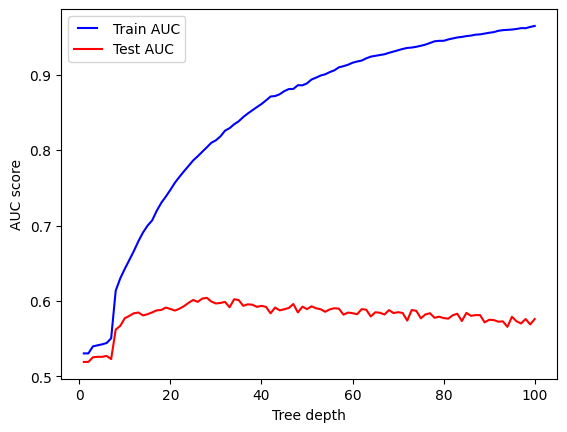

In [140]:
max_depths = np.linspace(1, 100, 100, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dtc = DecisionTreeClassifier(max_depth=max_depth)
   dtc.fit(tfidf_train, y_hate_train)
   train_pred = dtc.predict(tfidf_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dtc.predict(tfidf_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

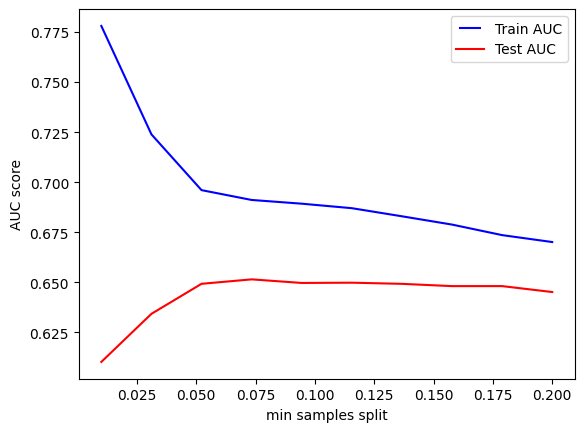

In [142]:
min_samples_splits = np.linspace(0.01, 0.2, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(tfidf_train, y_hate_train)
   train_pred = dt.predict(tfidf_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_hate_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(tfidf_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

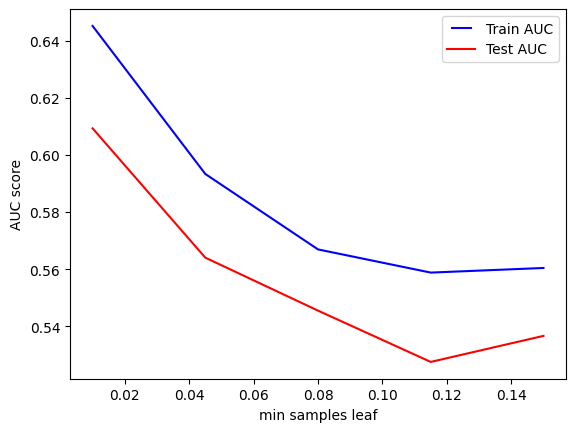

In [141]:
min_samples_leafs = np.linspace(0.01, 0.15, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(tfidf_train, y_hate_train)
   train_pred = dt.predict(tfidf_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(tfidf_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

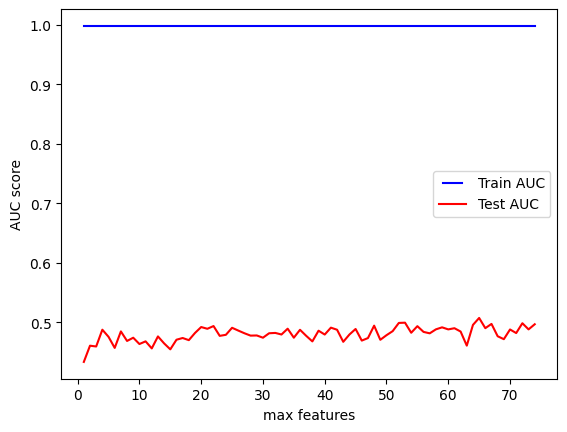

In [137]:
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(tfidf_train, y_hate_train)
   train_pred = dt.predict(tfidf_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(tfidf_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hate_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [16]:
# on decision tree classifier on hate speech
print("Results for support vector classification on all hate speech")
dtc = DecisionTreeClassifier(min_samples_leaf=0.01,min_samples_split=0.075,max_depth=30)
dtc.fit(tfidf_train,y_hate_train)
y_pred_test1 = dtc.predict(tfidf_test)
y_pred_train1 = dtc.predict(tfidf_train)

print("Accuracy on training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))
print(y_hate_test)
print(y_pred_test1)

Results for support vector classification on all hate speech
Accuracy on training data:
[[ 7839  7345]
 [ 4467 13273]]
              precision    recall  f1-score   support

           0       0.64      0.52      0.57     15184
           1       0.64      0.75      0.69     17740

    accuracy                           0.64     32924
   macro avg       0.64      0.63      0.63     32924
weighted avg       0.64      0.64      0.64     32924

Accuracy on test data:
[[ 897  955]
 [ 614 1654]]
              precision    recall  f1-score   support

           0       0.59      0.48      0.53      1852
           1       0.63      0.73      0.68      2268

    accuracy                           0.62      4120
   macro avg       0.61      0.61      0.61      4120
weighted avg       0.62      0.62      0.61      4120

0       1
1       0
2       1
3       0
4       1
       ..
4115    0
4116    0
4117    0
4118    1
4119    1
Name: Hate speech, Length: 4120, dtype: int64
[1 0 1 ... 1 1 1]


In [17]:
# Predicting hate speech with decision tree classifier
y_pred_twitter_dtc = dtc.predict(twitter_test)
y_pred_reddit_dtc = dtc.predict(reddit_test)

# concatenating the results
y_pred_twitter_dtc_df=pd.DataFrame(y_pred_twitter_dtc)
y_pred_twitter_dtc_df.columns=['dtc']
y_pred_reddit_dtc_df=pd.DataFrame(y_pred_reddit_dtc)
y_pred_reddit_dtc_df.columns=['dtc']
twitter=pd.concat([twitter,y_pred_twitter_dtc_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_dtc_df],axis=1)

In [18]:
# Random forest classifier for overall hate speech
Rando = RandomForestClassifier(n_estimators=35,random_state=0)
print("Results for Random forest regression on overall hate speech")
Rando.fit(tfidf_train,y_hate_train)
y_pred_test1 = Rando.predict(tfidf_test)
y_pred_train1 = Rando.predict(tfidf_train)
print("Accuracy on hate speech training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on hate speech test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))

Results for Random forest regression on overall hate speech
Accuracy on hate speech training data:
[[15147    37]
 [   28 17712]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15184
           1       1.00      1.00      1.00     17740

    accuracy                           1.00     32924
   macro avg       1.00      1.00      1.00     32924
weighted avg       1.00      1.00      1.00     32924

Accuracy on hate speech test data:
[[ 766 1086]
 [ 909 1359]]
              precision    recall  f1-score   support

           0       0.46      0.41      0.43      1852
           1       0.56      0.60      0.58      2268

    accuracy                           0.52      4120
   macro avg       0.51      0.51      0.51      4120
weighted avg       0.51      0.52      0.51      4120



In [19]:
# Predicting hate speech with random forest
y_pred_twitter_rando = Rando.predict(twitter_test)
y_pred_reddit_rando = Rando.predict(reddit_test)

# concatenating the results
y_pred_twitter_rando_df=pd.DataFrame(y_pred_twitter_rando)
y_pred_twitter_rando_df.columns=['random_forest']
y_pred_reddit_rando_df=pd.DataFrame(y_pred_reddit_rando)
y_pred_reddit_rando_df.columns=['random_forest']
twitter=pd.concat([twitter,y_pred_twitter_rando_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_rando_df],axis=1)

In [29]:
# MLP neural netowrk
mlp = MLPClassifier(hidden_layer_sizes=(50), activation='logistic', solver='adam', max_iter=1000)
mlp.fit(tfidf_train,y_hate_train)
# Neural network on hate speech
predict_train = mlp.predict(tfidf_train)
predict_test = mlp.predict(tfidf_test)
print("Results on training data for Neural network")
print(confusion_matrix(y_hate_train,predict_train))
print(classification_report(y_hate_train,predict_train))
print("Results on test data for Neural network")
print(confusion_matrix(y_hate_test,predict_test))
print(classification_report(y_hate_test,predict_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Results on training data for Neural network
[[15125    59]
 [  212 17528]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15184
           1       1.00      0.99      0.99     17740

    accuracy                           0.99     32924
   macro avg       0.99      0.99      0.99     32924
weighted avg       0.99      0.99      0.99     32924

Results on test data for Neural network
[[1066  786]
 [ 932 1336]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1852
           1       0.63      0.59      0.61      2268

    accuracy                           0.58      4120
   macro avg       0.58      0.58      0.58      4120
weighted avg       0.59      0.58      0.58      4120



In [92]:
tfidf_train

<32924x68861 sparse matrix of type '<class 'numpy.float64'>'
	with 8723323 stored elements in Compressed Sparse Row format>

In [30]:
# Predicting hate speech with a neural network on twitter and reddit
y_pred_twitter_mlp = mlp.predict(twitter_test)
y_pred_reddit_mlp = mlp.predict(reddit_test)

# concatenating the results
y_pred_twitter_mlp_df=pd.DataFrame(y_pred_twitter_mlp)
y_pred_twitter_mlp_df.columns=['neural_network']
y_pred_reddit_mlp_df=pd.DataFrame(y_pred_reddit_mlp)
y_pred_reddit_mlp_df.columns=['neural_network']
twitter=pd.concat([twitter,y_pred_twitter_mlp_df],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_mlp_df],axis=1)

In [35]:
twitter

,Unnamed: 0,id,created,text,possibly_sensitive,user,verified,rule,language,text_nostop,...,compound,log_regression,svc,dtc,random_forest,log_regression_rel,log_regression_eth,log_regression_gend,neural_network,mlp_ethnicity
0,0,1.601650e+18,2022-12-10T18:29:58.000Z,WE LOVE LIAM PAYNE 💗\n #EnglandVsFrance #Engla...,False,Judit,False,England France,en,WE LOVE LIAM PAYNE 💗 #EnglandVsFrance #England...,...,0.7125,0,1,1,1,0,0,0,1,1
1,1,1.601650e+18,2022-12-10T18:29:57.000Z,What has Islam got to do with it?,False,Antonio Plescia,False,Worldcup,en,What Islam got it?,...,0.0000,0,1,0,0,0,0,0,1,0
2,2,1.601650e+18,2022-12-10T18:29:57.000Z,2002. That was also the Cup where Nigeria bo...,False,Shiv Ramdas Traing To Rite Buk,True,England France,en,2002. That also Cup Nigeria bounced Argentina....,...,0.0000,0,0,0,0,0,0,0,1,1
3,3,1.601650e+18,2022-12-10T18:29:58.000Z,Grant Wahl was a healthy individual just like...,False,Porfirio Diaz,False,Worldcup,en,Grant Wahl healthy individual like many thousa...,...,0.4033,0,0,0,1,0,0,0,0,0
4,4,1.601650e+18,2022-12-10T18:29:58.000Z,#ssfootball France 🇫🇷 2 England 🇬🇧 1,False,Vinny Munda,False,England France,en,#ssfootball France 🇫🇷 2 England 🇬🇧 1,...,0.0000,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175442,175485,1.601680e+18,2022-12-10T21:01:23.000Z,fuck it rematch croatia vs france,False,bryxn,False,England France,en,fuck rematch croatia vs france,...,-0.5423,0,0,0,0,0,0,0,0,0
175443,175486,1.601680e+18,2022-12-10T21:01:23.000Z,Kane… I need my $300 back.,False,YOUNG CHOP’S RIGHT TITTY,False,Players,en,Kane… I need $300 back.,...,0.0000,1,1,1,1,0,0,0,1,1
175444,175487,1.601680e+18,2022-12-10T21:01:23.000Z,i’m wheezing because my boy is wearing his eng...,False,Papa G,False,England France,en,i’m wheezing boy wearing england tee siphakath...,...,0.0000,0,0,0,1,0,0,0,0,0
175445,175488,1.601680e+18,2022-12-10T21:01:23.000Z,The only good thing about this is we get a Mor...,False,Andrea.,False,England France,en,The good thing get Morocco - France semi,...,0.4404,0,0,0,1,0,0,0,0,0


In [36]:
twitter['text_nostop']

0         WE LOVE LIAM PAYNE 💗 #EnglandVsFrance #England...
1                                        What Islam got it?
2         2002. That also Cup Nigeria bounced Argentina....
3         Grant Wahl healthy individual like many thousa...
4                      #ssfootball France 🇫🇷 2 England 🇬🇧 1
                                ...                        
175442                       fuck rematch croatia vs france
175443                              Kane… I need $300 back.
175444    i’m wheezing boy wearing england tee siphakath...
175445             The good thing get Morocco - France semi
175446    So close Rashford. Well done bro. #ENG #FIFAWo...
Name: text_nostop, Length: 175447, dtype: object

In [20]:
# logistic regression for Religious hate speech
print("Results for logistic regression on religous hate speech")
logregression_religion = LogisticRegression(random_state=0,solver='liblinear')
logregression_religion.fit(tfidf_type_train,y_religion_train)
y_pred_test1 = logregression_religion.predict(tfidf_type_test)
y_pred_train1 = logregression_religion.predict(tfidf_type_train)

print("Accuracy on religion training data:")
print(confusion_matrix(y_religion_train,y_pred_train1))
print(classification_report(y_religion_train,y_pred_train1))
print("Accuracy on religion test data:")
print(confusion_matrix(y_religion_test,y_pred_test1))
print(classification_report(y_religion_test,y_pred_test1))



Results for logistic regression on religous hate speech
Accuracy on religion training data:
[[24834   268]
 [ 1474   562]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     25102
           1       0.68      0.28      0.39      2036

    accuracy                           0.94     27138
   macro avg       0.81      0.63      0.68     27138
weighted avg       0.92      0.94      0.92     27138

Accuracy on religion test data:
[[3065   34]
 [ 198   47]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3099
           1       0.58      0.19      0.29       245

    accuracy                           0.93      3344
   macro avg       0.76      0.59      0.63      3344
weighted avg       0.91      0.93      0.91      3344



In [23]:
# Predicting ethnicity based hate speech with logistic regression on twitter and reddit raw data
y_pred_twitter_logreg_rel = logregression_religion.predict(twitter_type_test)
y_pred_reddit_logreg_rel = logregression_religion.predict(reddit_type_test)

# concatenating the results
y_pred_twitter_logreg_df_rel=pd.DataFrame(y_pred_twitter_logreg_rel)
y_pred_twitter_logreg_df_rel.columns=['log_regression_rel']
y_pred_reddit_logreg_df_rel=pd.DataFrame(y_pred_reddit_logreg_rel)
y_pred_reddit_logreg_df_rel.columns=['log_regression_rel']
twitter=pd.concat([twitter,y_pred_twitter_logreg_df_rel],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_logreg_df_rel],axis=1)

In [24]:
# logistic regression for ethnicity or race based hate speech
print("Results for logistic regression on ethnicity or race based hate speech")
logregression_eth = LogisticRegression(random_state=0,solver='liblinear')
logregression_eth.fit(tfidf_type_train,y_ethnicity_train)
y_pred_test1_eth = logregression_eth.predict(tfidf_type_test)
y_pred_train1_eth = logregression_eth.predict(tfidf_type_train)

print("Accuracy on ethnicity or race based training data:")
print(confusion_matrix(y_ethnicity_train,y_pred_train1_eth))
print(classification_report(y_ethnicity_train,y_pred_train1_eth))
print("Accuracy on ethnicity or race based test data:")
print(confusion_matrix(y_ethnicity_test,y_pred_test1_eth))
print(classification_report(y_ethnicity_test,y_pred_test1_eth))

Results for logistic regression on ethnicity or race based hate speech
Accuracy on ethnicity or race based training data:
[[20561   830]
 [ 3610  2137]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21391
           1       0.72      0.37      0.49      5747

    accuracy                           0.84     27138
   macro avg       0.79      0.67      0.70     27138
weighted avg       0.82      0.84      0.82     27138

Accuracy on ethnicity or race based test data:
[[2496  122]
 [ 533  193]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2618
           1       0.61      0.27      0.37       726

    accuracy                           0.80      3344
   macro avg       0.72      0.61      0.63      3344
weighted avg       0.78      0.80      0.77      3344



In [25]:
# Predicting ethnicity based hate speech with logistic regression on twitter and reddit raw data
y_pred_twitter_logreg_eth = logregression_eth.predict(twitter_type_test)
y_pred_reddit_logreg_eth = logregression_eth.predict(reddit_type_test)

# concatenating the results
y_pred_twitter_logreg_df_eth=pd.DataFrame(y_pred_twitter_logreg_eth)
y_pred_twitter_logreg_df_eth.columns=['log_regression_eth']
y_pred_reddit_logreg_df_eth=pd.DataFrame(y_pred_reddit_logreg_eth)
y_pred_reddit_logreg_df_eth.columns=['log_regression_eth']
twitter=pd.concat([twitter,y_pred_twitter_logreg_df_eth],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_logreg_df_eth],axis=1)

In [31]:
# MLP for ethnicity or race based hate speech
print("Results for logistic regression on ethnicity or race based hate speech")
mlp_eth = MLPClassifier(hidden_layer_sizes=(40), activation='logistic', solver='adam', max_iter=500)
mlp_eth.fit(tfidf_type_train,y_ethnicity_train)
y_pred_test1_eth_mlp = mlp_eth.predict(tfidf_type_test)
y_pred_train1_eth_mlp = mlp_eth.predict(tfidf_type_train)

print("Accuracy on ethnicity or race based training data:")
print(confusion_matrix(y_ethnicity_train,y_pred_train1_eth_mlp))
print(classification_report(y_ethnicity_train,y_pred_train1_eth_mlp))
print("Accuracy on ethnicity or race based test data:")
print(confusion_matrix(y_ethnicity_test,y_pred_test1_eth_mlp))
print(classification_report(y_ethnicity_test,y_pred_test1_eth_mlp))

Results for logistic regression on ethnicity or race based hate speech
Accuracy on ethnicity or race based training data:
[[21371    20]
 [   21  5726]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21391
           1       1.00      1.00      1.00      5747

    accuracy                           1.00     27138
   macro avg       1.00      1.00      1.00     27138
weighted avg       1.00      1.00      1.00     27138

Accuracy on ethnicity or race based test data:
[[2282  336]
 [ 369  357]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2618
           1       0.52      0.49      0.50       726

    accuracy                           0.79      3344
   macro avg       0.69      0.68      0.68      3344
weighted avg       0.79      0.79      0.79      3344



In [33]:
# Predicting ethnicity based hate speech with mlp on twitter and reddit raw data 
y_pred_twitter_mlp_eth = mlp_eth.predict(twitter_type_test)
y_pred_reddit_mlp_eth = mlp_eth.predict(reddit_type_test)

# concatenating the results
y_pred_twitter_mlp_df_eth=pd.DataFrame(y_pred_twitter_mlp_eth)
y_pred_twitter_mlp_df_eth.columns=['mlp_ethnicity']
y_pred_reddit_mlp_df_eth=pd.DataFrame(y_pred_reddit_mlp_eth)
y_pred_reddit_mlp_df_eth.columns=['mlp_ethnicity']
twitter=pd.concat([twitter,y_pred_twitter_mlp_df_eth],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_mlp_df_eth],axis=1)

In [ ]:
# MLP for ethnicity or race based hate speech with extra data
print("Results for logistic regression on ethnicity or race based hate speech")
mlp_eth_ex = MLPClassifier(hidden_layer_sizes=(40), activation='logistic', solver='adam', max_iter=500)
mlp_eth_ex.fit(extra_type_train,y_ethnicity_train)
y_pred_test1_eth_mlp_eth_ex = mlp_eth_ex.predict(extra_type_test)
y_pred_train1_eth_mlp_eth_ex = mlp_eth_ex.predict(extra_type_train)

print("Accuracy on ethnicity or race based training data:")
print(confusion_matrix(y_ethnicity_train,y_pred_train1_eth_mlp_eth_ex))
print(classification_report(y_ethnicity_train,y_pred_train1_eth_mlp_eth_ex))
print("Accuracy on ethnicity or race based test data:")
print(confusion_matrix(y_ethnicity_test,y_pred_test1_eth_mlp_eth_ex))
print(classification_report(y_ethnicity_test,y_pred_test1_eth_mlp_eth_ex))

In [ ]:
# Predicting ethnicity based hate speech with mlp on twitter and reddit raw data 
y_pred_twitter_mlp_eth_ex = mlp_eth_ex.predict(extra_twitter)
y_pred_reddit_mlp_eth_ex = mlp_eth_ex.predict(extra_reddit)

# concatenating the results
y_pred_twitter_mlp_df_eth_ex=pd.DataFrame(y_pred_twitter_mlp_eth_ex)
y_pred_twitter_mlp_df_eth_ex.columns=['mlp_eth_ex']
y_pred_reddit_mlp_df_eth_ex=pd.DataFrame(y_pred_reddit_mlp_eth_ex)
y_pred_reddit_mlp_df_eth_ex.columns=['mlp_eth_ex']
twitter=pd.concat([twitter,y_pred_twitter_mlp_df_eth_ex],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_mlp_df_eth_ex],axis=1)

In [26]:
# logistic regression for gender based hate speech
print("Results for logistic regression on gender based hate speech")
logregression_gender = LogisticRegression(random_state=0,solver='liblinear')
logregression_gender.fit(tfidf_type_train,y_gender_train)
y_pred_test1 = logregression_gender.predict(tfidf_type_test)
y_pred_train1 = logregression_gender.predict(tfidf_type_train)

print("Accuracy on gender based training data:")
print(confusion_matrix(y_gender_train,y_pred_train1))
print(classification_report(y_gender_train,y_pred_train1))
print("Accuracy on gender based test data:")
print(confusion_matrix(y_gender_test,y_pred_test1))
print(classification_report(y_gender_test,y_pred_test1))

Results for logistic regression on gender based hate speech
Accuracy on gender based training data:
[[23414   412]
 [ 2341   971]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     23826
           1       0.70      0.29      0.41      3312

    accuracy                           0.90     27138
   macro avg       0.81      0.64      0.68     27138
weighted avg       0.88      0.90      0.88     27138

Accuracy on gender based test data:
[[2911   60]
 [ 282   91]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2971
           1       0.60      0.24      0.35       373

    accuracy                           0.90      3344
   macro avg       0.76      0.61      0.65      3344
weighted avg       0.88      0.90      0.88      3344



In [27]:
# Predicting ethnicity based hate speech with logistic regression on twitter and reddit raw data
y_pred_twitter_logreg_gend = logregression_gender.predict(twitter_type_test)
y_pred_reddit_logreg_gend = logregression_gender.predict(reddit_type_test)

# concatenating the results
y_pred_twitter_logreg_df_gend=pd.DataFrame(y_pred_twitter_logreg_gend)
y_pred_twitter_logreg_df_gend.columns=['log_regression_gend']
y_pred_reddit_logreg_df_gend=pd.DataFrame(y_pred_reddit_logreg_gend)
y_pred_reddit_logreg_df_gend.columns=['log_regression_gend']
twitter=pd.concat([twitter,y_pred_twitter_logreg_df_gend],axis=1)
reddit=pd.concat([reddit,y_pred_reddit_logreg_df_gend],axis=1)

In [87]:
# logistic regression for sexuality based hate speech
print("Results for logistic regression on sexuality based hate speech")
logregression.fit(tfidf_type_train,y_sexuality_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on sexuality based training data:")
print(confusion_matrix(y_sexuality_train,y_pred_train1))
print(classification_report(y_sexuality_train,y_pred_train1))
print("Accuracy on sexuality based test data:")
print(confusion_matrix(y_sexuality_test,y_pred_test1))
print(classification_report(y_sexuality_test,y_pred_test1))

Results for logistic regression on sexuality based hate speech
Accuracy on sexuality based training data:
[[25766   112]
 [ 1054   206]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25878
           1       0.65      0.16      0.26      1260

    accuracy                           0.96     27138
   macro avg       0.80      0.58      0.62     27138
weighted avg       0.95      0.96      0.94     27138

Accuracy on sexuality based test data:
[[3166   22]
 [ 138   18]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3188
           1       0.45      0.12      0.18       156

    accuracy                           0.95      3344
   macro avg       0.70      0.55      0.58      3344
weighted avg       0.93      0.95      0.94      3344



In [88]:
# logistic regression for immigration based hate speech
print("Results for logistic regression on immigration based hate speech")
logregression.fit(tfidf_type_train,y_immigration_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on immigration based training data:")
print(confusion_matrix(y_immigration_train,y_pred_train1))
print(classification_report(y_immigration_train,y_pred_train1))
print("Accuracy on immigration based test data:")
print(confusion_matrix(y_immigration_test,y_pred_test1))
print(classification_report(y_immigration_test,y_pred_test1))

Results for logistic regression on immigration based hate speech
Accuracy on immigration based training data:
[[25697   187]
 [  886   368]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25884
           1       0.66      0.29      0.41      1254

    accuracy                           0.96     27138
   macro avg       0.81      0.64      0.69     27138
weighted avg       0.95      0.96      0.95     27138

Accuracy on immigration based test data:
[[3146   33]
 [ 131   34]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3179
           1       0.51      0.21      0.29       165

    accuracy                           0.95      3344
   macro avg       0.73      0.60      0.63      3344
weighted avg       0.94      0.95      0.94      3344



In [89]:
# logistic regression for disability based hate speech
print("Results for logistic regression on disability based hate speech")
logregression.fit(tfidf_type_train,y_disability_train)
y_pred_test1 = logregression.predict(tfidf_type_test)
y_pred_train1 = logregression.predict(tfidf_type_train)

print("Accuracy on disability based training data:")
print(confusion_matrix(y_disability_train,y_pred_train1))
print(classification_report(y_disability_train,y_pred_train1))
print("Accuracy on disability based test data:")
print(confusion_matrix(y_disability_test,y_pred_test1))
print(classification_report(y_disability_test,y_pred_test1))

Results for logistic regression on disability based hate speech
Accuracy on disability based training data:
[[26674    26]
 [  402    36]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26700
           1       0.58      0.08      0.14       438

    accuracy                           0.98     27138
   macro avg       0.78      0.54      0.57     27138
weighted avg       0.98      0.98      0.98     27138

Accuracy on disability based test data:
[[3259    6]
 [  72    7]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3265
           1       0.54      0.09      0.15        79

    accuracy                           0.98      3344
   macro avg       0.76      0.54      0.57      3344
weighted avg       0.97      0.98      0.97      3344



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rando_random = RandomizedSearchCV(estimator = Rando, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rando_random.fit(train_features, train_labels)

In [57]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
print("Results for Ada Boost and decision tree classifier on overall hate speech")
Adab.fit(tfidf_train,y_hate_train)
y_pred_test1 = Adab.predict(tfidf_test)
y_pred_train1 = Adab.predict(tfidf_train)
print("Accuracy on hate speech training data:")
print(confusion_matrix(y_hate_train,y_pred_train1))
print(classification_report(y_hate_train,y_pred_train1))
print("Accuracy on hate speech test data:")
print(confusion_matrix(y_hate_test,y_pred_test1))
print(classification_report(y_hate_test,y_pred_test1))

Results for Ada Boost and decision tree classifier on overall hate speech
Accuracy on hate speech training data:
[[12407  2777]
 [ 8861  8879]]
              precision    recall  f1-score   support

           0       0.58      0.82      0.68     15184
           1       0.76      0.50      0.60     17740

    accuracy                           0.65     32924
   macro avg       0.67      0.66      0.64     32924
weighted avg       0.68      0.65      0.64     32924

Accuracy on hate speech test data:
[[1399  453]
 [1266 1002]]
              precision    recall  f1-score   support

           0       0.52      0.76      0.62      1852
           1       0.69      0.44      0.54      2268

    accuracy                           0.58      4120
   macro avg       0.61      0.60      0.58      4120
weighted avg       0.62      0.58      0.57      4120



In [69]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
print("Results for Ada Boost and decision tree classifier on gender based hate speech")

Adab.fit(tfidf_type_train,y_gender_train)
y_pred_test1 = Adab.predict(tfidf_type_test)
y_pred_train1 = Adab.predict(tfidf_type_train)

print("Accuracy on gender based training data:")
print(confusion_matrix(y_gender_train,y_pred_train1))
print(classification_report(y_gender_train,y_pred_train1))
print("Accuracy on gender based test data:")
print(confusion_matrix(y_gender_test,y_pred_test1))
print(classification_report(y_gender_test,y_pred_test1))

Results for Ada Boost and decision tree classifier on gender based hate speech
Accuracy on gender based training data:
[[23147   797]
 [ 1462  1850]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     23944
           1       0.70      0.56      0.62      3312

    accuracy                           0.92     27256
   macro avg       0.82      0.76      0.79     27256
weighted avg       0.91      0.92      0.91     27256

Accuracy on gender based test data:
[[2842  141]
 [ 204  169]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2983
           1       0.55      0.45      0.49       373

    accuracy                           0.90      3356
   macro avg       0.74      0.70      0.72      3356
weighted avg       0.89      0.90      0.89      3356



In [42]:
# Religion based randomforest

Rando.fit(tfidf_type_train,y_religion_train)
y_pred_test1 = Rando.predict(tfidf_type_test)
y_pred_train1 = Rando.predict(tfidf_type_train)

print("Accuracy on religion training data:")
print(confusion_matrix(y_religion_train,y_pred_train1))
print(classification_report(y_religion_train,y_pred_train1))
print("Accuracy on religion test data:")
print(confusion_matrix(y_religion_test,y_pred_test1))
print(classification_report(y_religion_test,y_pred_test1))

Accuracy on religion training data:
[[25217     6]
 [   18  2015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25223
           1       1.00      0.99      0.99      2033

    accuracy                           1.00     27256
   macro avg       1.00      1.00      1.00     27256
weighted avg       1.00      1.00      1.00     27256

Accuracy on religion test data:
[[3031   81]
 [ 162   82]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3112
           1       0.50      0.34      0.40       244

    accuracy                           0.93      3356
   macro avg       0.73      0.66      0.68      3356
weighted avg       0.92      0.93      0.92      3356



In [28]:
reddit.to_csv('reddit_regression.csv')
twitter.to_csv('twitter_regression.csv')

In [34]:
reddit.to_csv('reddit_regression_with_mlp.csv')
twitter.to_csv('twitter_regression_with_mlp.csv')

In [ ]:
## Below is further model training that i carried out earlier

In [189]:
##parameter_space = {
#    'hidden_layer_sizes': [(100,100), (100), (100,100,100)],
#    'activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate': ['constant','invscaling','adaptive'],
#    'alpha':[0.001,0.05]
#}
## testing hate speech with different activations
activations = [ 'logistic']
for active in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(50), activation='logistic', solver='adam', max_iter=300)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(active)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


logistic
Results on training data for Neural network
[[15127    57]
 [  250 17490]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15184
           1       1.00      0.99      0.99     17740

    accuracy                           0.99     32924
   macro avg       0.99      0.99      0.99     32924
weighted avg       0.99      0.99      0.99     32924

Results on test data for Neural network
[[1075  777]
 [ 911 1357]]
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1852
           1       0.64      0.60      0.62      2268

    accuracy                           0.59      4120
   macro avg       0.59      0.59      0.59      4120
weighted avg       0.59      0.59      0.59      4120



In [76]:
solvers = ['sgd', 'adam']
for solve in solvers:
    mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='logistic', solver=solve, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(solve)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

sgd
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


adam
Results on training data for Neural network
[[13751  1433]
 [ 1173 16567]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     15184
           1       0.92      0.93      0.93     17740

    accuracy                           0.92     32924
   macro avg       0.92      0.92      0.92     32924
weighted avg       0.92      0.92      0.92     32924

Results on test data for Neural network
[[ 908  944]
 [ 988 1280]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1852
           1       0.58      0.56      0.57      2268

    accuracy                           0.53      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.53      0.53      0.53      4120



In [78]:
learning_rates = ['constant','invscaling','adaptive']
for learning in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='logistic', solver='adam', learning_rate=learning, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(learning)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

constant
Results on training data for Neural network
[[14118  1066]
 [  668 17072]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15184
           1       0.94      0.96      0.95     17740

    accuracy                           0.95     32924
   macro avg       0.95      0.95      0.95     32924
weighted avg       0.95      0.95      0.95     32924

Results on test data for Neural network
[[ 910  942]
 [ 990 1278]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49      1852
           1       0.58      0.56      0.57      2268

    accuracy                           0.53      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.53      0.53      0.53      4120

invscaling
Results on training data for Neural network
[[14296   888]
 [  929 16811]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15184


In [81]:
alphas=[0.001,0.01,0.05]
for alph in alphas:
    mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation='logistic', solver='adam', alpha=alph, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural netwrrok on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(alph)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

    

0.001
Results on training data for Neural network
[[14081  1103]
 [  898 16842]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     15184
           1       0.94      0.95      0.94     17740

    accuracy                           0.94     32924
   macro avg       0.94      0.94      0.94     32924
weighted avg       0.94      0.94      0.94     32924

Results on test data for Neural network
[[ 949  903]
 [1036 1232]]
              precision    recall  f1-score   support

           0       0.48      0.51      0.49      1852
           1       0.58      0.54      0.56      2268

    accuracy                           0.53      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.53      0.53      0.53      4120

0.01
Results on training data for Neural network
[[14088  1096]
 [ 1233 16507]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     15184
         

In [82]:
hidden_layers= [(100,100), (100), (100,100,100),(100,10),(10),(100,10,100),(100,100,10),(10,100,100)]
for hidden_layer in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='logistic', solver='adam', alpha=0.05, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural network on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(hidden_layer)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(100, 100)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100
Results on training data for Neural network
[[11529  3655]
 [ 3243 14497]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     15184
           1       0.80      0.82      0.81     17740

    accuracy                           0.79     32924
   macro avg       0.79      0.79      0.79     32924
weighted avg       0.79      0.79      0.79     32924

Results on test data for Neural network
[[1025  827]
 [ 823 1445]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1852
           1       0.64      0.64      0.64      2268

    accuracy                           0.60      4120
   macro avg       0.60      0.60      0.60      4120
weighted avg       0.60      0.60      0.60      4120

(100, 100, 100)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(100, 10)
Results on training data for Neural network
[[13007  2177]
 [ 1405 16335]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     15184
           1       0.88      0.92      0.90     17740

    accuracy                           0.89     32924
   macro avg       0.89      0.89      0.89     32924
weighted avg       0.89      0.89      0.89     32924

Results on test data for Neural network
[[ 882  970]
 [ 916 1352]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.48      1852
           1       0.58      0.60      0.59      2268

    accuracy                           0.54      4120
   macro avg       0.54      0.54      0.54      4120
weighted avg       0.54      0.54      0.54      4120

10
Results on training data for Neural network
[[11848  3336]
 [ 3191 14549]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     15184
       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(100, 100, 10)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(10, 100, 100)
Results on training data for Neural network
[[    0 15184]
 [    0 17740]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15184
           1       0.54      1.00      0.70     17740

    accuracy                           0.54     32924
   macro avg       0.27      0.50      0.35     32924
weighted avg       0.29      0.54      0.38     32924

Results on test data for Neural network
[[   0 1852]
 [   0 2268]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1852
           1       0.55      1.00      0.71      2268

    accuracy                           0.55      4120
   macro avg       0.28      0.50      0.36      4120
weighted avg       0.30      0.55      0.39      4120



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
hidden_layers= [(25),(50),(10,10),(25,25)]
for hidden_layer in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='logistic', solver='adam', alpha=0.05, max_iter=500)
    mlp.fit(tfidf_train,y_hate_train)
    # Neural network on hate speech
    predict_train = mlp.predict(tfidf_train)
    predict_test = mlp.predict(tfidf_test)
    print(hidden_layer)
    print("Results on training data for Neural network")
    print(confusion_matrix(y_hate_train,predict_train))
    print(classification_report(y_hate_train,predict_train))
    print("Results on test data for Neural network")
    print(confusion_matrix(y_hate_test,predict_test))
    print(classification_report(y_hate_test,predict_test))

25
Results on training data for Neural network
[[11220  3964]
 [ 2772 14968]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     15184
           1       0.79      0.84      0.82     17740

    accuracy                           0.80     32924
   macro avg       0.80      0.79      0.79     32924
weighted avg       0.80      0.80      0.79     32924

Results on test data for Neural network
[[ 963  889]
 [ 773 1495]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      1852
           1       0.63      0.66      0.64      2268

    accuracy                           0.60      4120
   macro avg       0.59      0.59      0.59      4120
weighted avg       0.59      0.60      0.60      4120

50
Results on training data for Neural network
[[10719  4465]
 [ 2480 15260]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76     15184
           1  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(25, 25)
Results on training data for Neural network
[[13011  2173]
 [ 1173 16567]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     15184
           1       0.88      0.93      0.91     17740

    accuracy                           0.90     32924
   macro avg       0.90      0.90      0.90     32924
weighted avg       0.90      0.90      0.90     32924

Results on test data for Neural network
[[ 878  974]
 [ 920 1348]]
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1852
           1       0.58      0.59      0.59      2268

    accuracy                           0.54      4120
   macro avg       0.53      0.53      0.53      4120
weighted avg       0.54      0.54      0.54      4120



In [62]:
# make sure that result directory exists before running any of the functions
result_dir = Path.cwd() / 'results'
if not result_dir.exists():
    result_dir.mkdir()

    
def tune_with_grid_search(x_train, y_train, param_grid):
    svc = svm.SVC()

    start = time()
    gs_results = GridSearchCV(svc, param_grid, cv=5).fit(x_train, y_train)
    duration = time() - start

    results = DataFrame(gs_results.cv_results_)
    results.loc[:, 'mean_test_score'] *= 100
    results.to_csv(result_dir / 'svc_results.csv')
    
    # take the most relevant columns and sort (for readability)
    results = results.loc[:, ('rank_test_score', 'mean_test_score', 'params')]
    results.sort_values(by='rank_test_score', ascending=True, inplace=True)

    return results, duration

In [63]:

def main(x_train, y_train, x_test,y_test):
    # use fixed random state for repeatable data set


    svc_params = {
        'C': [0.1, 0.5, 1, 2, 5, 10],
        'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
        'tol': [1e-3, 1e-2]
    }

    gs_results, gs_duration = tune_with_grid_search(x_train, y_train, svc_params)
    
    print(gs_results.head())
    
    score = gs_results['mean_test_score'].iloc[0]
    params = gs_results['params'].iloc[0]
    
    svc = svm.SVC(**params)
    svc.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, svc.predict(x_test))

    print(f'Best score for GridSearchCv is {score:.3f}, took {gs_duration:.2f} seconds')
    print(f'Params: {params}')
    print(f'Corresponding test accuracy: {accuracy * 100:.2f}%\n')




In [64]:
#if __name__ == '__main__':
#    main(tfidf_train, y_hate_train,tfidf_test,y_hate_test)
#this showed that:
#Best score for GridSearchCv is 64.573, took 50857.36 seconds
#Params: {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.001}
#Corresponding test accuracy: 61.99%

    rank_test_score  mean_test_score  \
12                1        64.573162   
13                2        64.509380   
21                3        64.318029   
20                4        64.299806   
9                 5        64.196532   

                                           params  
12  {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.001}  
13   {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.01}  
21     {'C': 1, 'kernel': 'sigmoid', 'tol': 0.01}  
20    {'C': 1, 'kernel': 'sigmoid', 'tol': 0.001}  
9     {'C': 0.5, 'kernel': 'linear', 'tol': 0.01}  
Best score for GridSearchCv is 64.573, took 50857.36 seconds
Params: {'C': 0.5, 'kernel': 'sigmoid', 'tol': 0.001}
Corresponding test accuracy: 61.99%



In [65]:
# Using grid search to chose the best parametrs for an MLP classifier neural network
mlp=MLPClassifier( max_iter=300, random_state=0)

parameter_space = {
#    'hidden_layer_sizes': [(100,100), (100), (100,100,100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate': ['constant','invscaling','adaptive'],
#    'alpha':[0.001,0.05]
}

clf = GridSearchCV(mlp, hidden_layer_space=(10,5), parameter_space, n_jobs=-1, cv=3)
clf.fit(tfidf_train,y_hate_train)

print('Best parameters found:\n', clf.best_params_)


y_true, y_pred = y_hate_train, clf.predict(tfidf_train)
print('Results on the training set:')
print(classification_report(y_true, y_pred))
y_true, y_pred = y_hate_test, clf.predict(tfidf_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

KeyboardInterrupt: 